In [106]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

In [107]:
bitcoindf = pd.read_csv('bitcoin.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [108]:
dogecoindf = pd.read_csv('doge.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,40889.0
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,61189.0
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,43332.0
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,60323.0
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,60512.0


In [109]:
ethereumdf = pd.read_csv('ethereum.csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [110]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')

In [111]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)
dogecoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'pink'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,0.000127,0.000129,0.000123,0.000126,0.000126,40889.000000
1,2015-09-14 00:00:00,0.000125,0.000126,0.000122,0.000125,0.000125,61189.000000
2,2015-09-15 00:00:00,0.000125,0.000131,0.000123,0.000126,0.000126,43332.000000
3,2015-09-16 00:00:00,0.000126,0.000126,0.000122,0.000124,0.000124,60323.000000
4,2015-09-17 00:00:00,0.000124,0.000126,0.000122,0.000125,0.000125,60512.000000


In [112]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'skyblue'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.000000
1,2015-09-14 00:00:00,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.000000
2,2015-09-15 00:00:00,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.000000
3,2015-09-16 00:00:00,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.000000
4,2015-09-17 00:00:00,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.000000


In [113]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
ethereumdf.head().style.set_properties(subset=['date','close'], **{'background-color': 'lightgrey'})

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,1.041780,1.042700,0.902832,0.936003,0.936003,644138.000000
1,2015-09-14 00:00:00,0.940566,0.949387,0.871760,0.875622,0.875622,741085.000000
2,2015-09-15 00:00:00,0.875189,1.045540,0.875189,0.944410,0.944410,703390.000000
3,2015-09-16 00:00:00,0.941977,0.952698,0.901639,0.907175,0.907175,615593.000000
4,2015-09-17 00:00:00,0.906865,0.909204,0.831132,0.874231,0.874231,897940.000000


Text(0.5, 1.0, 'Ethereum Close Price')

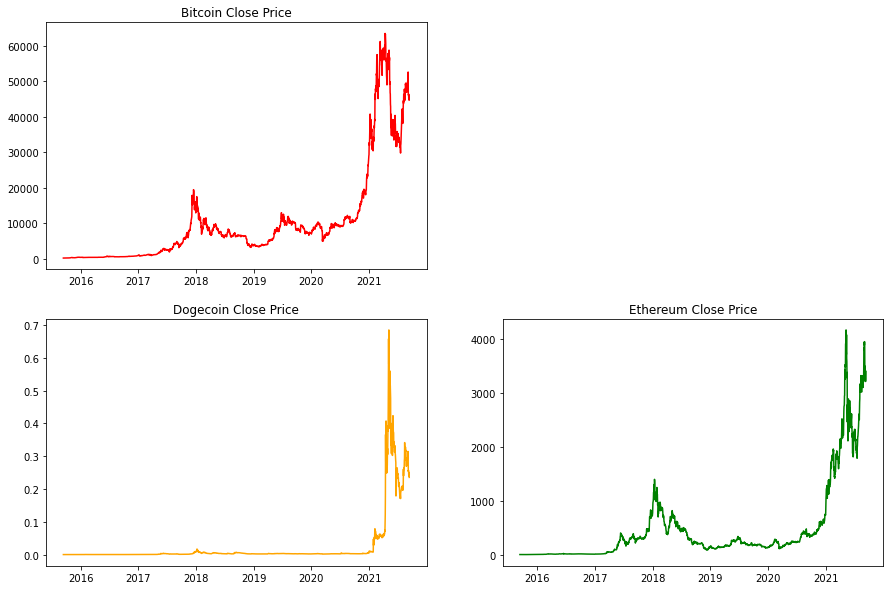

In [114]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

In [115]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '11-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '11-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '11-2020']

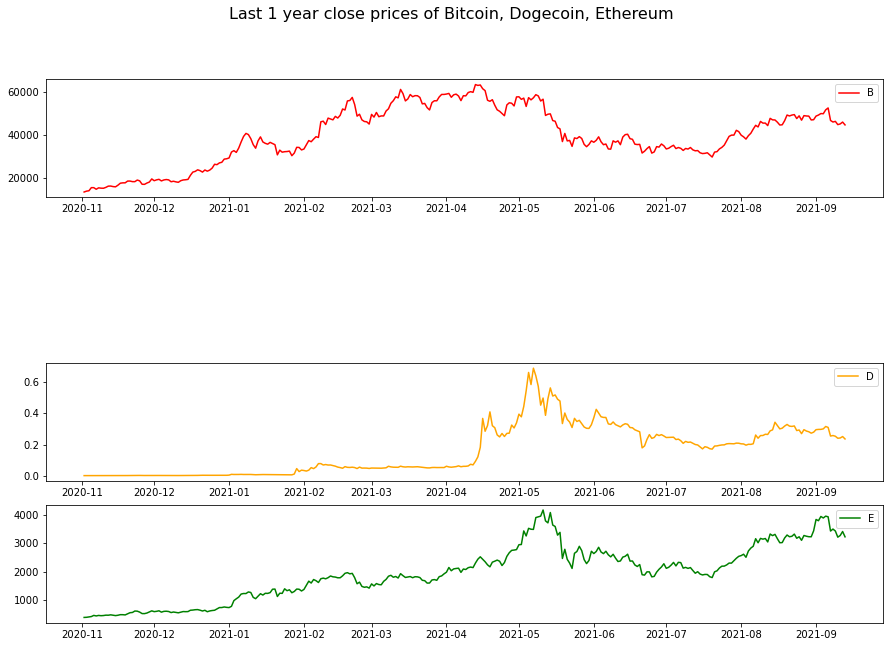

In [116]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")

plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")

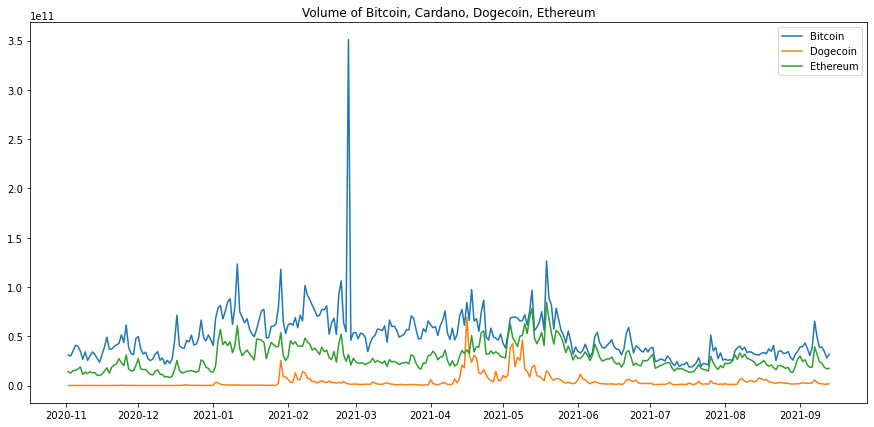

In [117]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['volume'])
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['volume'])
plt.title('Volume of Bitcoin, Cardano, Dogecoin, Ethereum')
plt.legend(['Bitcoin', 'Dogecoin', 'Ethereum'])


plt.show()

In [118]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '08-2021']
last1month_dogecoindf = dogecoindf[dogecoindf['date'] > '08-2021']
last1month_ethereumdf = ethereumdf[ethereumdf['date'] > '08-2021']

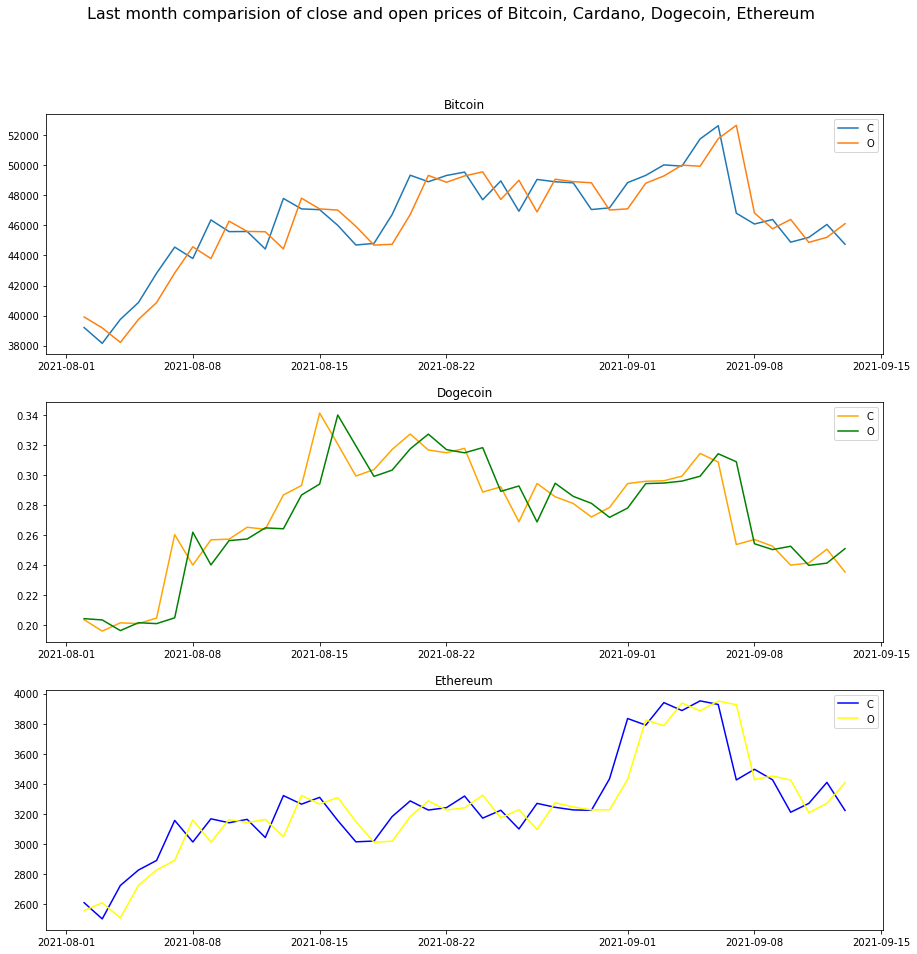

In [119]:
fig = plt.figure(figsize = (15,15))
fig.suptitle("Last month comparision of close and open prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)
fig.tight_layout()

plt.subplot(3, 1, 1)
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'])
plt.legend(["C", "O"])
plt.title("Bitcoin")

plt.subplot(3, 1, 2)
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['close'], color="orange")
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['open'], color="green")
plt.legend(["C", "O"])
plt.title("Dogecoin")

plt.subplot(3, 1, 3)
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['close'], color="blue")
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['open'], color="yellow")
plt.legend(["C", "O"])
plt.title("Ethereum")


plt.show()

Text(0.5, 1.0, 'Ethereum Close Price moving average')

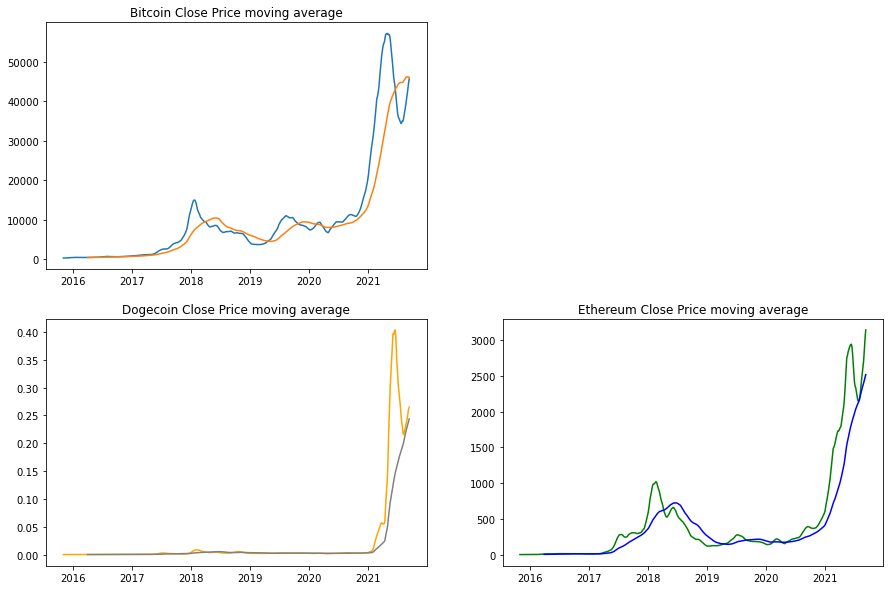

In [120]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(50).mean(), color="orange")
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(200).mean(), color="grey")
plt.title('Dogecoin Close Price moving average')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(50).mean(), color="green")
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(200).mean(), color="blue")
plt.title('Ethereum Close Price moving average')

In [121]:
closedf = ethereumdf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [122]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


In [123]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


In [124]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


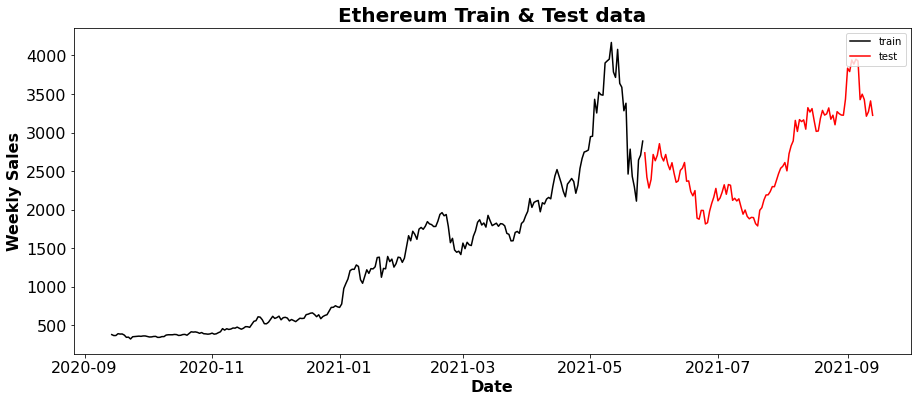

In [125]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Ethereum Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [126]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [127]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


In [128]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.05897218811384699
Root Mean squared Error - RMSE : 0.07080650700169798


In [130]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (239, 1)
Test data prediction: (94, 1)


In [131]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [132]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Ethereum - Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=8, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [133]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [134]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [135]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [136]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [137]:
dogeCloseDf = dogecoindf[['date','close']]
dogeCloseDf = dogeCloseDf[dogeCloseDf['date'] > '2020-09-13']
close_stock = dogeCloseDf.copy()

del dogeCloseDf['date']
scaler=MinMaxScaler(feature_range=(0,1))
dogeCloseDf=scaler.fit_transform(np.array(dogeCloseDf).reshape(-1,1))

doge_training_size=int(len(dogeCloseDf)*0.70)
doge_test_size=len(dogeCloseDf)-doge_training_size
doge_train_data,doge_test_data=dogeCloseDf[0:doge_training_size,:],dogeCloseDf[doge_training_size:len(dogeCloseDf),:1]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_doge_train, y_doge_train = create_dataset(doge_test_size, time_step)
X_doge_test, y_doge_test = create_dataset(doge_test_data, time_step)

doge_model = XGBRegressor(n_estimators=1000)
doge_model.fit(X_doge_train, y_doge_train, verbose=False)

TypeError: object of type 'int' has no len()